In [70]:
import numpy as np
import matplotlib.pyplot as axs["Left"]
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from scipy.optimize import curve_fit
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm

In [71]:
datapath = Path.cwd()
file = "mean_std.jld2"

# Scaling Plot Total Error

In [72]:
f = h5py.File(file, "r")
mean_std_RS_13 = f["mean_std_RS_13"][()]
mean_std_RPS_13 = f["mean_std_RPS_13"][()]
mean_std_BS_13 = f["mean_std_BS_13"][()]

mean_std_RS_15 = f["mean_std_RS_15"][()]
mean_std_RPS_15 = f["mean_std_RPS_15"][()]
mean_std_BS_15 = f["mean_std_BS_15"][()]

mean_std_RS_17 = f["mean_std_RS_17"][()]
mean_std_RPS_17 = f["mean_std_RPS_17"][()]
mean_std_BS_17 = f["mean_std_BS_17"][()]

mean_std_RS_19 = f["mean_std_RS_19"][()]
mean_std_RPS_19 = f["mean_std_RPS_19"][()]
mean_std_BS_19 = f["mean_std_BS_19"][()]

mean_std_RS_21 = f["mean_std_RS_21"][()]
mean_std_RPS_21 = f["mean_std_RPS_21"][()]
mean_std_BS_21 = f["mean_std_BS_21"][()]

Ns = [13,15,17,19,21]
n_states_RS = np.arange(2,101,1)
n_states = np.arange(2,1001,1)

In [80]:
file2 = "fit_params.jld2"
f = h5py.File(file2, "r")
params_RPS_13 = f["params_RPS_13"][()]
params_BS_13 = f["params_BS_13"][()]

params_RPS_15 = f["params_RPS_15"][()]
params_BS_15 = f["params_BS_15"][()]

params_RPS_17 = f["params_RPS_17"][()]
params_BS_17 = f["params_BS_17"][()]

params_RPS_19 = f["params_RPS_19"][()]
params_BS_19 = f["params_BS_19"][()]

params_RPS_21 = f["params_RPS_21"][()]
params_BS_21 = f["params_BS_21"][()]

In [81]:
def func_13(n):
    return np.exp(params_RPS_13[0]/params_BS_13[0] * np.log(n) + (params_RPS_13[1]-params_BS_13[1])/params_BS_13[0])
	
def func_15(n):
    return np.exp(params_RPS_15[0]/params_BS_15[0] * np.log(n) + (params_RPS_15[1]-params_BS_15[1])/params_BS_15[0])
	
def func_17(n):
    return np.exp(params_RPS_17[0]/params_BS_17[0] * np.log(n) + (params_RPS_17[1]-params_BS_17[1])/params_BS_17[0])
	
def func_19(n):
    return np.exp(params_RPS_19[0]/params_BS_19[0] * np.log(n) + (params_RPS_19[1]-params_BS_19[1])/params_BS_19[0])
	
def func_21(n):
    return np.exp(params_RPS_21[0]/params_BS_21[0] * np.log(n) + (params_RPS_21[1]-params_BS_21[1])/params_BS_21[0])

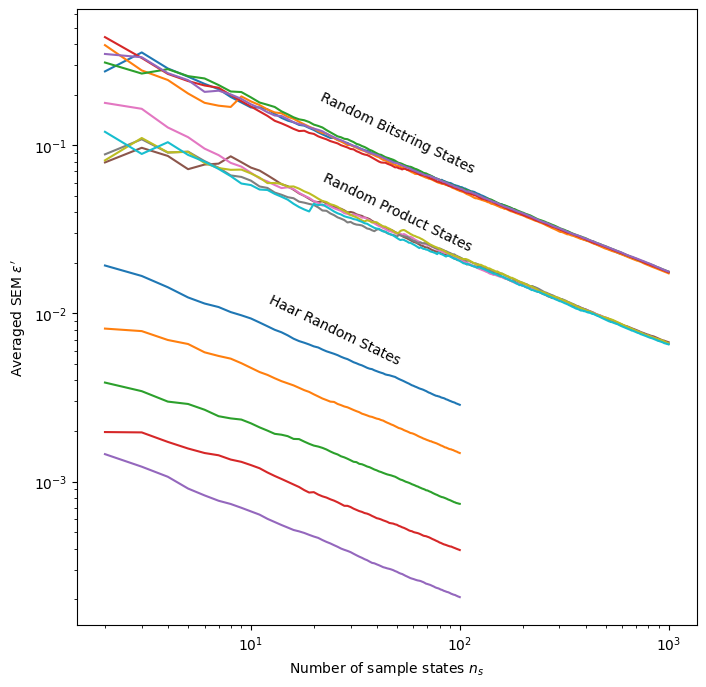

In [123]:
fig = plt.figure(figsize=(8,8))
plt.plot(n_states_RS,mean_std_RS_13)
plt.plot(n_states_RS,mean_std_RS_15)
plt.plot(n_states_RS,mean_std_RS_17)
plt.plot(n_states_RS,mean_std_RS_19)
plt.plot(n_states_RS,mean_std_RS_21)

plt.plot(n_states,mean_std_RPS_13)
plt.plot(n_states,mean_std_RPS_15)
plt.plot(n_states,mean_std_RPS_17)
plt.plot(n_states,mean_std_RPS_19)
plt.plot(n_states,mean_std_RPS_21)

plt.plot(n_states,mean_std_BS_13)
plt.plot(n_states,mean_std_BS_15)
plt.plot(n_states,mean_std_BS_17)
plt.plot(n_states,mean_std_BS_19)
plt.plot(n_states,mean_std_BS_21)
plt.yscale("log")
plt.xscale("log")

plt.ylabel(r"Averaged SEM $\epsilon^\prime$")
plt.xlabel(r"Number of sample states $n_s$")

plt.text(2.5e1,8e-3,"Haar Random States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
plt.text(5e1,4e-2,"Random Product States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
plt.text(5e1,1.2e-1,"Random Bitstring States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
plt.show()

/tmp/ipykernel_3738/2352367925.py:2: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_13[0]/params_BS_13[0] * np.log(n) + (params_RPS_13[1]-params_BS_13[1])/params_BS_13[0])
/tmp/ipykernel_3738/2352367925.py:5: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_15[0]/params_BS_15[0] * np.log(n) + (params_RPS_15[1]-params_BS_15[1])/params_BS_15[0])
/tmp/ipykernel_3738/2352367925.py:8: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_17[0]/params_BS_17[0] * np.log(n) + (params_RPS_17[1]-params_BS_17[1])/params_BS_17[0])
/tmp/ipykernel_3738/2352367925.py:11: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_19[0]/params_BS_19[0] * np.log(n) + (params_RPS_19[1]-params_BS_19[1])/params_BS_19[0])
/tmp/ipykernel_3738/2352367925.py:14: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_21[0]/params_BS_21[0] * np.log(n) + (params_RPS_21[1]-params_BS_21[1])/param

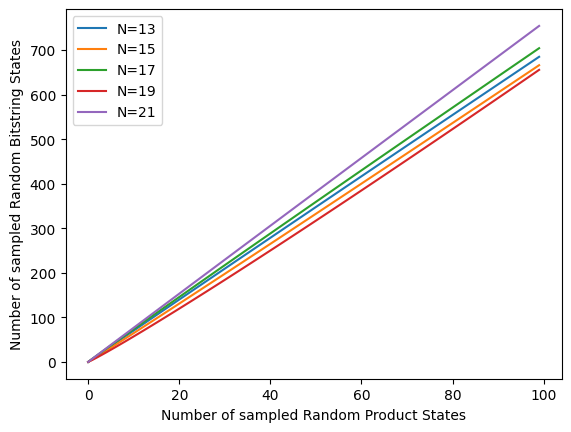

In [121]:
plt.plot(np.arange(0,100,1),func_13(np.arange(0,100,1)),label="N=13")
plt.plot(np.arange(0,100,1),func_15(np.arange(0,100,1)),label="N=15")
plt.plot(np.arange(0,100,1),func_17(np.arange(0,100,1)),label="N=17")
plt.plot(np.arange(0,100,1),func_19(np.arange(0,100,1)),label="N=19")
plt.plot(np.arange(0,100,1),func_21(np.arange(0,100,1)),label="N=21")


plt.xlabel("Number of sampled Random Product States")
plt.ylabel("Number of sampled Random Bitstring States")
plt.legend()

Text(0.5, 0, 'Particle Number $N$')

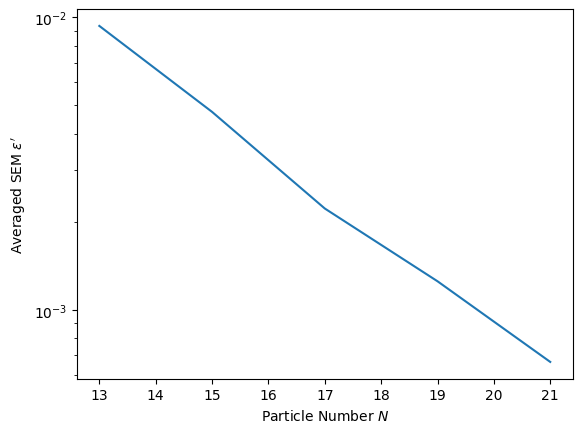

In [130]:
s = 8 # i.e. 10 states
plt.plot([13,15,17,19,21],[mean_std_RS_13[s],mean_std_RS_15[s],mean_std_RS_17[s],mean_std_RS_19[s],mean_std_RS_21[s]])
plt.yscale("log")
plt.ylabel(r"Averaged SEM $\epsilon^\prime$")
plt.xlabel(r"Particle Number $N$")

/tmp/ipykernel_3738/2352367925.py:2: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_13[0]/params_BS_13[0] * np.log(n) + (params_RPS_13[1]-params_BS_13[1])/params_BS_13[0])
/tmp/ipykernel_3738/2352367925.py:5: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_15[0]/params_BS_15[0] * np.log(n) + (params_RPS_15[1]-params_BS_15[1])/params_BS_15[0])
/tmp/ipykernel_3738/2352367925.py:8: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_17[0]/params_BS_17[0] * np.log(n) + (params_RPS_17[1]-params_BS_17[1])/params_BS_17[0])
/tmp/ipykernel_3738/2352367925.py:11: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_19[0]/params_BS_19[0] * np.log(n) + (params_RPS_19[1]-params_BS_19[1])/params_BS_19[0])
/tmp/ipykernel_3738/2352367925.py:14: RuntimeWarning: divide by zero encountered in log
  return np.exp(params_RPS_21[0]/params_BS_21[0] * np.log(n) + (params_RPS_21[1]-params_BS_21[1])/param

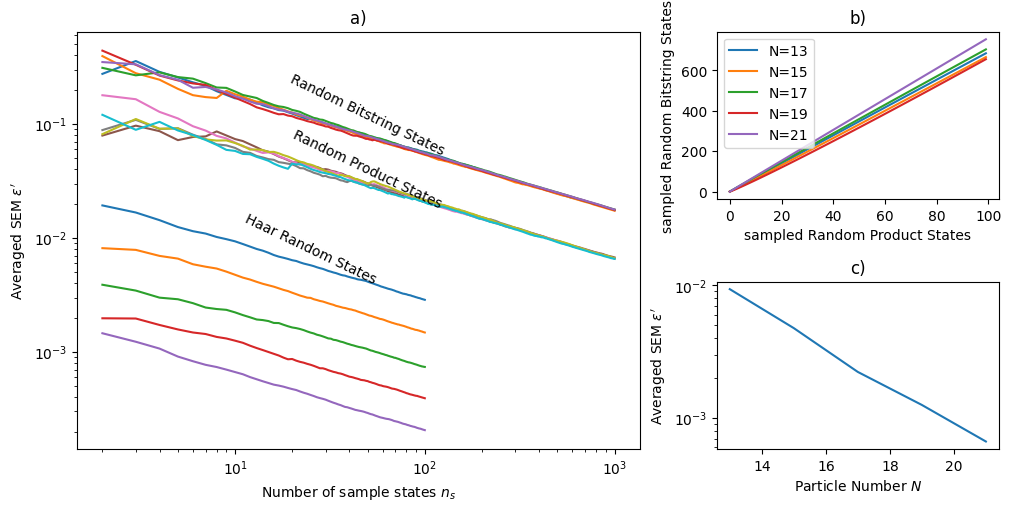

In [131]:
fig = plt.figure(constrained_layout=True,figsize=(10,5))
axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                          gridspec_kw={'width_ratios':[2, 1]})
axs['Left'].set_title('a)')
axs['TopRight'].set_title('b)')
axs['BottomRight'].set_title('c)')

#Left
axs["Left"].plot(n_states_RS,mean_std_RS_13)
axs["Left"].plot(n_states_RS,mean_std_RS_15)
axs["Left"].plot(n_states_RS,mean_std_RS_17)
axs["Left"].plot(n_states_RS,mean_std_RS_19)
axs["Left"].plot(n_states_RS,mean_std_RS_21)

axs["Left"].plot(n_states,mean_std_RPS_13)
axs["Left"].plot(n_states,mean_std_RPS_15)
axs["Left"].plot(n_states,mean_std_RPS_17)
axs["Left"].plot(n_states,mean_std_RPS_19)
axs["Left"].plot(n_states,mean_std_RPS_21)

axs["Left"].plot(n_states,mean_std_BS_13)
axs["Left"].plot(n_states,mean_std_BS_15)
axs["Left"].plot(n_states,mean_std_BS_17)
axs["Left"].plot(n_states,mean_std_BS_19)
axs["Left"].plot(n_states,mean_std_BS_21)
axs["Left"].set_yscale("log")
axs["Left"].set_xscale("log")

axs["Left"].set_ylabel(r"Averaged SEM $\epsilon^\prime$")
axs["Left"].set_xlabel(r"Number of sample states $n_s$")

axs["Left"].text(2.5e1,8e-3,"Haar Random States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
axs["Left"].text(5e1,4e-2,"Random Product States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")
axs["Left"].text(5e1,1.2e-1,"Random Bitstring States",rotation=np.arctan(-0.48)/(2*np.pi)*360,ha="center",va="center")

#TopRight
axs["TopRight"].plot(np.arange(0,100,1),func_13(np.arange(0,100,1)),label="N=13")
axs["TopRight"].plot(np.arange(0,100,1),func_15(np.arange(0,100,1)),label="N=15")
axs["TopRight"].plot(np.arange(0,100,1),func_17(np.arange(0,100,1)),label="N=17")
axs["TopRight"].plot(np.arange(0,100,1),func_19(np.arange(0,100,1)),label="N=19")
axs["TopRight"].plot(np.arange(0,100,1),func_21(np.arange(0,100,1)),label="N=21")


axs["TopRight"].set_xlabel("sampled Random Product States")
axs["TopRight"].set_ylabel("sampled Random Bitstring States")
axs["TopRight"].legend()

#BottomRight
s = 8 # i.e. 10 states
axs["BottomRight"].plot([13,15,17,19,21],[mean_std_RS_13[s],mean_std_RS_15[s],mean_std_RS_17[s],mean_std_RS_19[s],mean_std_RS_21[s]])
axs["BottomRight"].set_yscale("log")
axs["BottomRight"].set_ylabel(r"Averaged SEM $\epsilon^\prime$")
axs["BottomRight"].set_xlabel(r"Particle Number $N$")

plt.show()